# **Life Expectancy in Brazil**


---



## 1. Across the world, people are living longer

In 1900, the average life expectancy of a newborn was 32 years. By 2021 this had more than doubled to 71 years. In Brazil its growth from 48 in 1950 to 72 in 2021.
But when and why has this dramatic change occurred?

To understand it, we can look at data on life expectancy.

The large reduction in child mortality has played an important role in increasing life expectancy.

This remarkable shift is also results from advances in medicine, public health, and living standards. Along with it, many predictions of the ‘limit’ of life expectancy have been broken.

In this project, we will try to do a predictive analysis of when life expectancy in our country will be 100 years old.


---


## 2. Dataset Used and Limitatios
The dataset used is provided by [Our World in Data](https://ourworldindata.org/life-expectancy?insight=women-tend-to-live-longer-than-men-but-this-gap-has-changed-over-time#key-insights)

The data contains just information about life expectancy, so it's not possible to understand the reasons for the increase in life expectancy.

## Data Processing


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
expect_life_df = pd.read_csv("life-expectation-at-birth-by-sex.csv", sep=";")

expect_life_df.head()

,Entity,Code,Year,Expectancy-Sex: Famale,Expectancy - Sex: male - Age: 0
0,Afghanistan,AFG,1950.0,283905,271286
1,Afghanistan,AFG,1951.0,286345,273639
2,Afghanistan,AFG,1952.0,29126,278377
3,Afghanistan,AFG,1953.0,296212,283146
4,Afghanistan,AFG,1954.0,299004,286239


In [3]:
expect_life_br = expect_life_df.loc[expect_life_df['Entity'] == 'Brazil']


expect_life_br.tail()

,Entity,Code,Year,Expectancy-Sex: Famale,Expectancy - Sex: male - Age: 0
2363,Brazil,BRA,2017.0,780322,716354
2364,Brazil,BRA,2018.0,782655,719561
2365,Brazil,BRA,2019.0,784695,722029
2366,Brazil,BRA,2020.0,773747,707003
2367,Brazil,BRA,2021.0,760086,695597


In [4]:
expect_life_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 2296 to 2367
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           72 non-null     object 
 1   Code                             72 non-null     object 
 2   Year                             72 non-null     float64
 3   Expectancy-Sex: Famale           72 non-null     int64  
 4   Expectancy - Sex: male - Age: 0  72 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
expect_life_br = expect_life_br[["Year","Expectancy-Sex: Famale","Expectancy - Sex: male - Age: 0"]]

expect_life_br = expect_life_br.rename(columns={'Year': 'Ano', 'Expectancy-Sex: Famale':'Expectativa de vida - Feminino','Expectancy - Sex: male - Age: 0':'Expectativa de vida - Masculino'})

In [6]:
expect_life_br['Expectativa de vida - Feminino'] = expect_life_br['Expectativa de vida - Feminino'].astype(str).str.slice(0, 2)
expect_life_br['Expectativa de vida - Masculino'] = expect_life_br['Expectativa de vida - Masculino'].astype(str).str.slice(0, 2)


In [7]:
expect_life_br = expect_life_br.astype(int)

In [8]:
expect_life_br.head()

,Ano,Expectativa de vida - Feminino,Expectativa de vida - Masculino
2296,1950,51,45
2297,1951,51,45
2298,1952,51,46
2299,1953,51,46
2300,1954,52,47


<ipython-input-9-ad6895531965>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=expect_life_br, x='Ano', y='Expectativa de vida - Feminino', marker="1", palette="pastel")
<ipython-input-9-ad6895531965>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=expect_life_br, x='Ano', y='Expectativa de vida - Masculino', marker="1", palette="pastel")


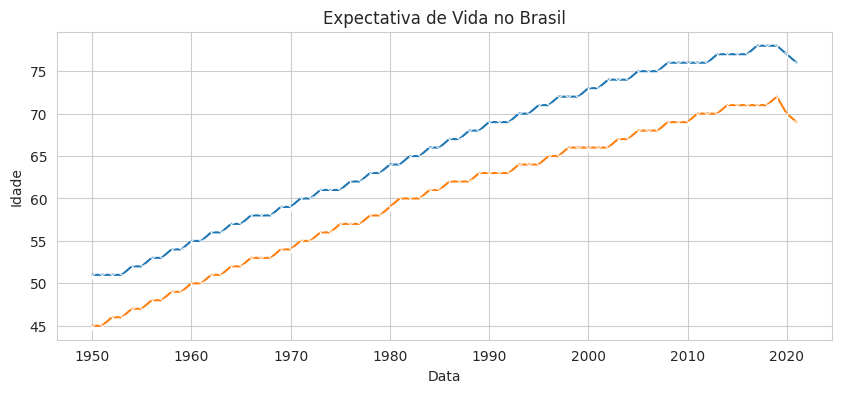

In [9]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=expect_life_br, x='Ano', y='Expectativa de vida - Feminino', marker="1", palette="pastel")
  grafico = sns.lineplot(data=expect_life_br, x='Ano', y='Expectativa de vida - Masculino', marker="1", palette="pastel")
  grafico.set(title='Expectativa de Vida no Brasil', ylabel='Idade', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

###Observations:


*   Line charts confirm that the life expectancy growth in Brazil during the period inquired
*   Women's life expectancy is always above of men's life expectancy along the time
*   Gap between women and men gets bigger after 1990



## Analyze Data

In [10]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    expect_life_br.drop(['Ano'], axis=1),
    expect_life_br['Ano'],
    test_size=0.30,
    random_state=123
)

In [11]:
predictors_train.head()

,Expectativa de vida - Feminino,Expectativa de vida - Masculino
2315,59,54
2327,64,60
2302,53,48
2349,74,67
2355,76,69


In [12]:
predictors_test.head()

,Expectativa de vida - Feminino,Expectativa de vida - Masculino
2359,77,70
2322,62,57
2367,76,69
2361,77,71
2319,61,56


In [13]:
target_train.head()

2315    1969
2327    1981
2302    1956
2349    2003
2355    2009
Name: Ano, dtype: int64

In [14]:
model = LinearRegression()

model = model.fit(predictors_train, target_train)

In [15]:
target_predicted = model.predict(predictors_test)

In [16]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

3.540299984930374


In [17]:
expect_life_br.head(1)

,Ano,Expectativa de vida - Feminino,Expectativa de vida - Masculino
2296,1950,51,45


In [18]:
expect_100 = np.array([100,100])

In [20]:
previsao = model.predict(expect_100.reshape(1, -1))
print(previsao)

[2066.9539937]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Conclusion

*   Our analyze predicts that probably in 2066 the newborns will have a life expectancy of 100 years old
*   To better comprehend It's necessary other data to understand the reason for the increase in life expectancy and why the gap between women's and men's growth



